In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Computational Physics Exercise 3
### Jan Kesting, Felix Fleischle - 12.5.2023 - Tutor: Jeong Yun Choi

In this exercise we are going to implement the three body problem using a Runge-Kutta-4 Integrator.
To do this, we are going to import the RK4 implementation that we were provided with:

In [2]:
def rk4_step(y0, x0, f, h, f_args = {}):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0, x0, **f_args)
    k2 = h * f(y0 + k1/2., x0 + h/2., **f_args)
    k3 = h * f(y0 + k2/2., x0 + h/2., **f_args)
    k4 = h * f(y0 + k3, x0 + h, **f_args)
    
    xp1 = x0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n, f_args = {}):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
            f_args - Dictionary of additional arguments to be passed to the function f
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h, f_args = f_args)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

#### a)

As a first step, we are going to set the masses to 1. Note that G is also set to 1, so we will just leave it out of the equations.

In [3]:
m1 = 1
m2 = 1
m3 = 1

Next, we are going to set the initial conditions of the system. The initial conditions are the initial coordinates (x,y) and initial velocities (vx, vy) of each of the three bodies. We will implement this as a single numpy array, with x of the 1st body as entry 0, y of the 1st body as entry 1, vx of the 1st body as entry 2 and vy of the first body as entry 4, and so on.

In [4]:
y0 = np.array([0.97000436, -0.24308753, -0.46620368, -0.43236573, 0, 0, 0.93240737, 0.86473146, -0.97000436, 0.24308753, -0.46620368, -0.43236573])

Now we are going to define the ODE functions needed for the RK4. The second order ODEs can be found on https://en.wikipedia.org/wiki/Three-body_problem for example.

In [5]:
# The first equation is the simple time derivative of the position,
# which we need when rewriting the second order ODEs of the three body problem to first order ODEs

# The derivative takes the whole y0 vector as input and returns the two corresponding velocity components
def derivative_pos1(y0):
    return y0[2:4]

def derivative_pos2(y0):
    return y0[6:8]

def derivative_pos3(y0):
    return y0[10:12]

# The remaining ODEs are the equations for the derivatives of the velocities, which involve the gravitational forces

# First we are going to define the numerator as a function, so we do not have to type it every time
def numerator(vec):
    return np.sqrt(vec[0]**2 + vec[1]**2)

# now the actual acceleration equation
def acceleration_1(y0, m2, m3):
    return -m2*(y0[0:2] - y0[4:6])/(numerator(y0[0:2] - y0[4:6]))**3 - m3*(y0[0:2] - y0[8:10])/(numerator(y0[0:2] - y0[8:10]))**3

def acceleration_2(y0, m3, m1):
    return -m3*(y0[4:6] - y0[8:10])/(numerator(y0[4:6] - y0[8:10]))**3 - m1*(y0[4:6] - y0[0:2])/(numerator(y0[4:6] - y0[0:2]))**3

def acceleration_3(y0, m1, m2):
    return -m1*(y0[8:10] - y0[0:2])/(numerator(y0[8:10] - y0[0:2]))**3 - m2*(y0[8:10] - y0[4:6])/(numerator(y0[8:10] - y0[4:6]))**3

# Now we can define a master function that computes the derivative of all array components

def master(y0, x0, m1, m2, m3):
    return np.array([derivative_pos1(y0)[0], derivative_pos1(y0)[1], acceleration_1(y0, m2, m3)[0], acceleration_1(y0, m2, m3)[1], derivative_pos2(y0)[0], derivative_pos2(y0)[1], acceleration_2(y0, m3, m1)[0], acceleration_2(y0, m3, m1)[1], derivative_pos3(y0)[0], derivative_pos3(y0)[1], acceleration_3(y0, m1, m2)[0], acceleration_3(y0, m1, m2)[1]])

In [6]:
# Now do the computation:
# Define the step size:
h = 0.005

y,x = rk4(y0, 0, master, h, 500, f_args={"m1":1, "m2":1, "m3":1})

print(y)

# extract the position information from the output vector
x_1 = y[:,0]
y_1 = y[:,1]
x_2 = y[:,4]
y_2 = y[:,5]
x_3 = y[:,8]
y_3 = y[:,9]

[[ 0.97000436 -0.24308753 -0.46620368 ...  0.24308753 -0.46620368
  -0.43236573]
 [ 0.96765815 -0.24524552 -0.47228659 ...  0.24092195 -0.46016156
  -0.43385953]
 [ 0.96528143 -0.24739565 -0.47841022 ...  0.23874902 -0.45416028
  -0.43530318]
 ...
 [-1.0733814   0.06812632 -0.10572292 ...  0.28878193  1.08967894
   0.53229312]
 [-1.07390063  0.06578978 -0.10196968 ...  0.29142062  1.09158822
   0.52316622]
 [-1.07440112  0.06345321 -0.0982298  ...  0.29401341  1.09340814
   0.51393082]]


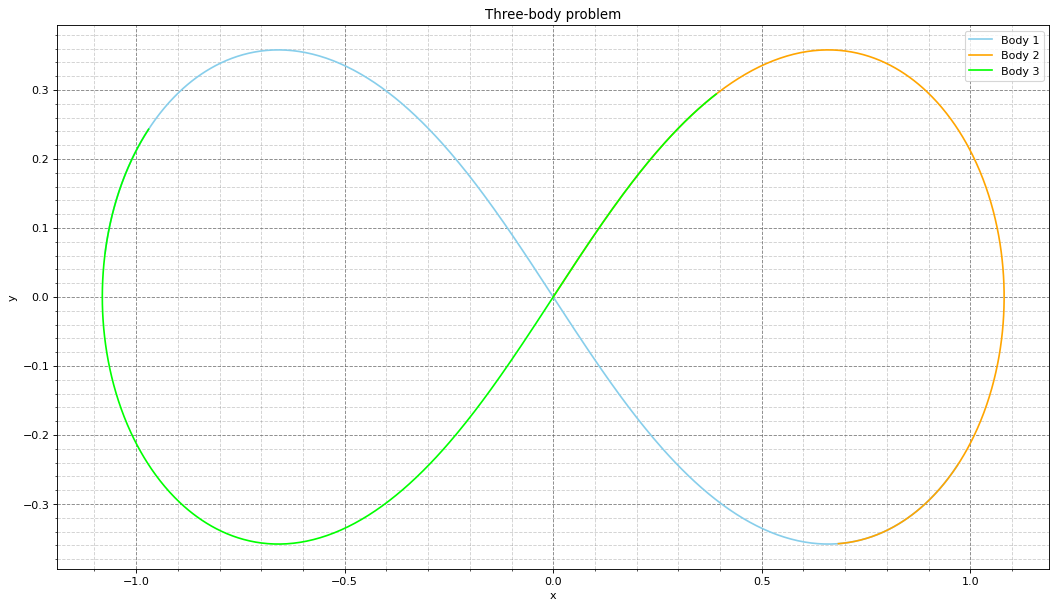

In [7]:
# Plotting the movement of the bodies
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(x_1,y_1, label="Body 1",color='skyblue')
plt.plot(x_2,y_2, label="Body 2",color='orange')
plt.plot(x_3,y_3, label="Body 3",color='lime')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three-body problem')
#plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

#### b)

In [8]:
# Meissel-Burrau-Problem: Initial conditions
y0 = np.array([1., 3., 0., 0., -2., -1., 0., 0., 1., -1., 0., 0.])

# defining a linear function to plot the starting triangle later
def lin(x, a , b):
    return x*a + b

# defining linspace for the triangle
l3 = np.linspace(-2, 1, 5)

In [9]:
# Now do the computation:
# Define the step size:
h = 0.0001

y,x = rk4(y0, 0, master, h, 50000, f_args={"m1":3, "m2":4, "m3":5})

print(y)

# extract the position information from the output vector
x_1 = y[:,0]
y_1 = y[:,1]
x_2 = y[:,4]
y_2 = y[:,5]
x_3 = y[:,8]
y_3 = y[:,9]

[[ 1.00000000e+00  3.00000000e+00  0.00000000e+00 ... -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00 -9.60000001e-06 ... -9.99999999e-01
  -4.44444445e-05  1.87500000e-05]
 [ 9.99999998e-01  2.99999999e+00 -1.92000001e-05 ... -9.99999996e-01
  -8.88888893e-05  3.75000001e-05]
 ...
 [ 2.39581925e+00 -1.02270265e+00  1.81879717e-01 ...  8.57156680e-01
   4.37873630e-01 -1.45265385e-01]
 [ 2.39583743e+00 -1.02267347e+00  1.81813779e-01 ...  8.57142152e-01
   4.37859775e-01 -1.45311181e-01]
 [ 2.39585561e+00 -1.02264429e+00  1.81747839e-01 ...  8.57127618e-01
   4.37845923e-01 -1.45356975e-01]]


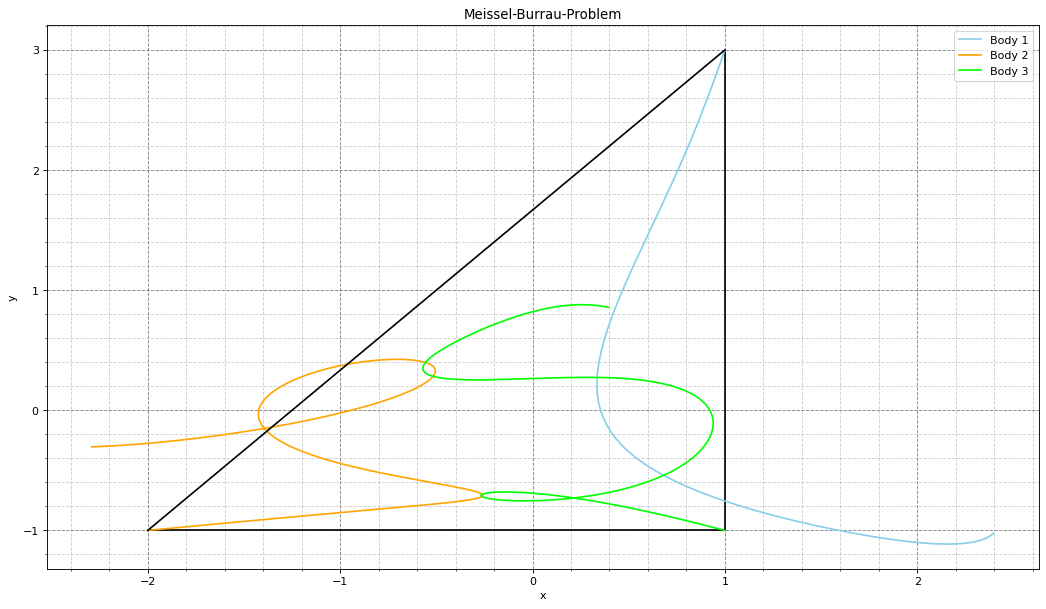

In [10]:
# Plotting the movement of the bodies
plt.figure(figsize=(16, 9), dpi=80)
plt.plot(x_1,y_1, label="Body 1",color='skyblue')
plt.plot(x_2,y_2, label="Body 2",color='orange')
plt.plot(x_3,y_3, label="Body 3",color='lime')
plt.hlines(-1, -2, 1, color='black')
plt.vlines(1, -1, 3, color='black')
plt.plot(l3, lin(l3, 4/3, 1.6666), color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Meissel-Burrau-Problem')
#plt.yscale('log')
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()

Finding the points in time with minimum distance:

In [11]:
def distance(x_a, y_a, x_b, y_b):
    return np.sqrt((x_a - x_b)**2 + (y_a - y_b)**2)

# distance between body 1 and 2:
mindist_12 = distance(x_1, y_1, x_2, y_2).argmin()
print("Time of minimum distance between bodies 1 and 2:", mindist_12)

# distance between body 1 and 3:
mindist_13 = distance(x_1, y_1, x_3, y_3).argmin()
print("Time of minimum distance between bodies 1 and 3:", mindist_13)

# distance between body 2 and 3:
mindist_23 = distance(x_2, y_2, x_3, y_3).argmin()
print("Time of minimum distance between bodies 2 and 3:", mindist_23)

Time of minimum distance between bodies 1 and 2: 29444
Time of minimum distance between bodies 1 and 3: 30191
Time of minimum distance between bodies 2 and 3: 18793


#### Behavior for different step sizes:

In [12]:
h_array = np.array([0.1, 0.01, 0.001, 0.0001])

Defining the Energy as a function for iii)

In [20]:
def energy(y0, m1, m2, m3):
    return 0.5 * m1 *  numerator(y0[2:4])**2 + 0.5 * m2 *  numerator(y0[6:8])**2 + 0.5 * m3 *  numerator(y0[10:12])**2 - m1*m2/numerator(y0[0:2] - y0[4:6]) - m2*m3/numerator(y0[8:10] - y0[4:6]) - m3*m1/numerator(y0[8:10] - y0[4:6])

Plotting i) the orbital movements, ii) the mutual distances and iii) the energy loss for all different time steps

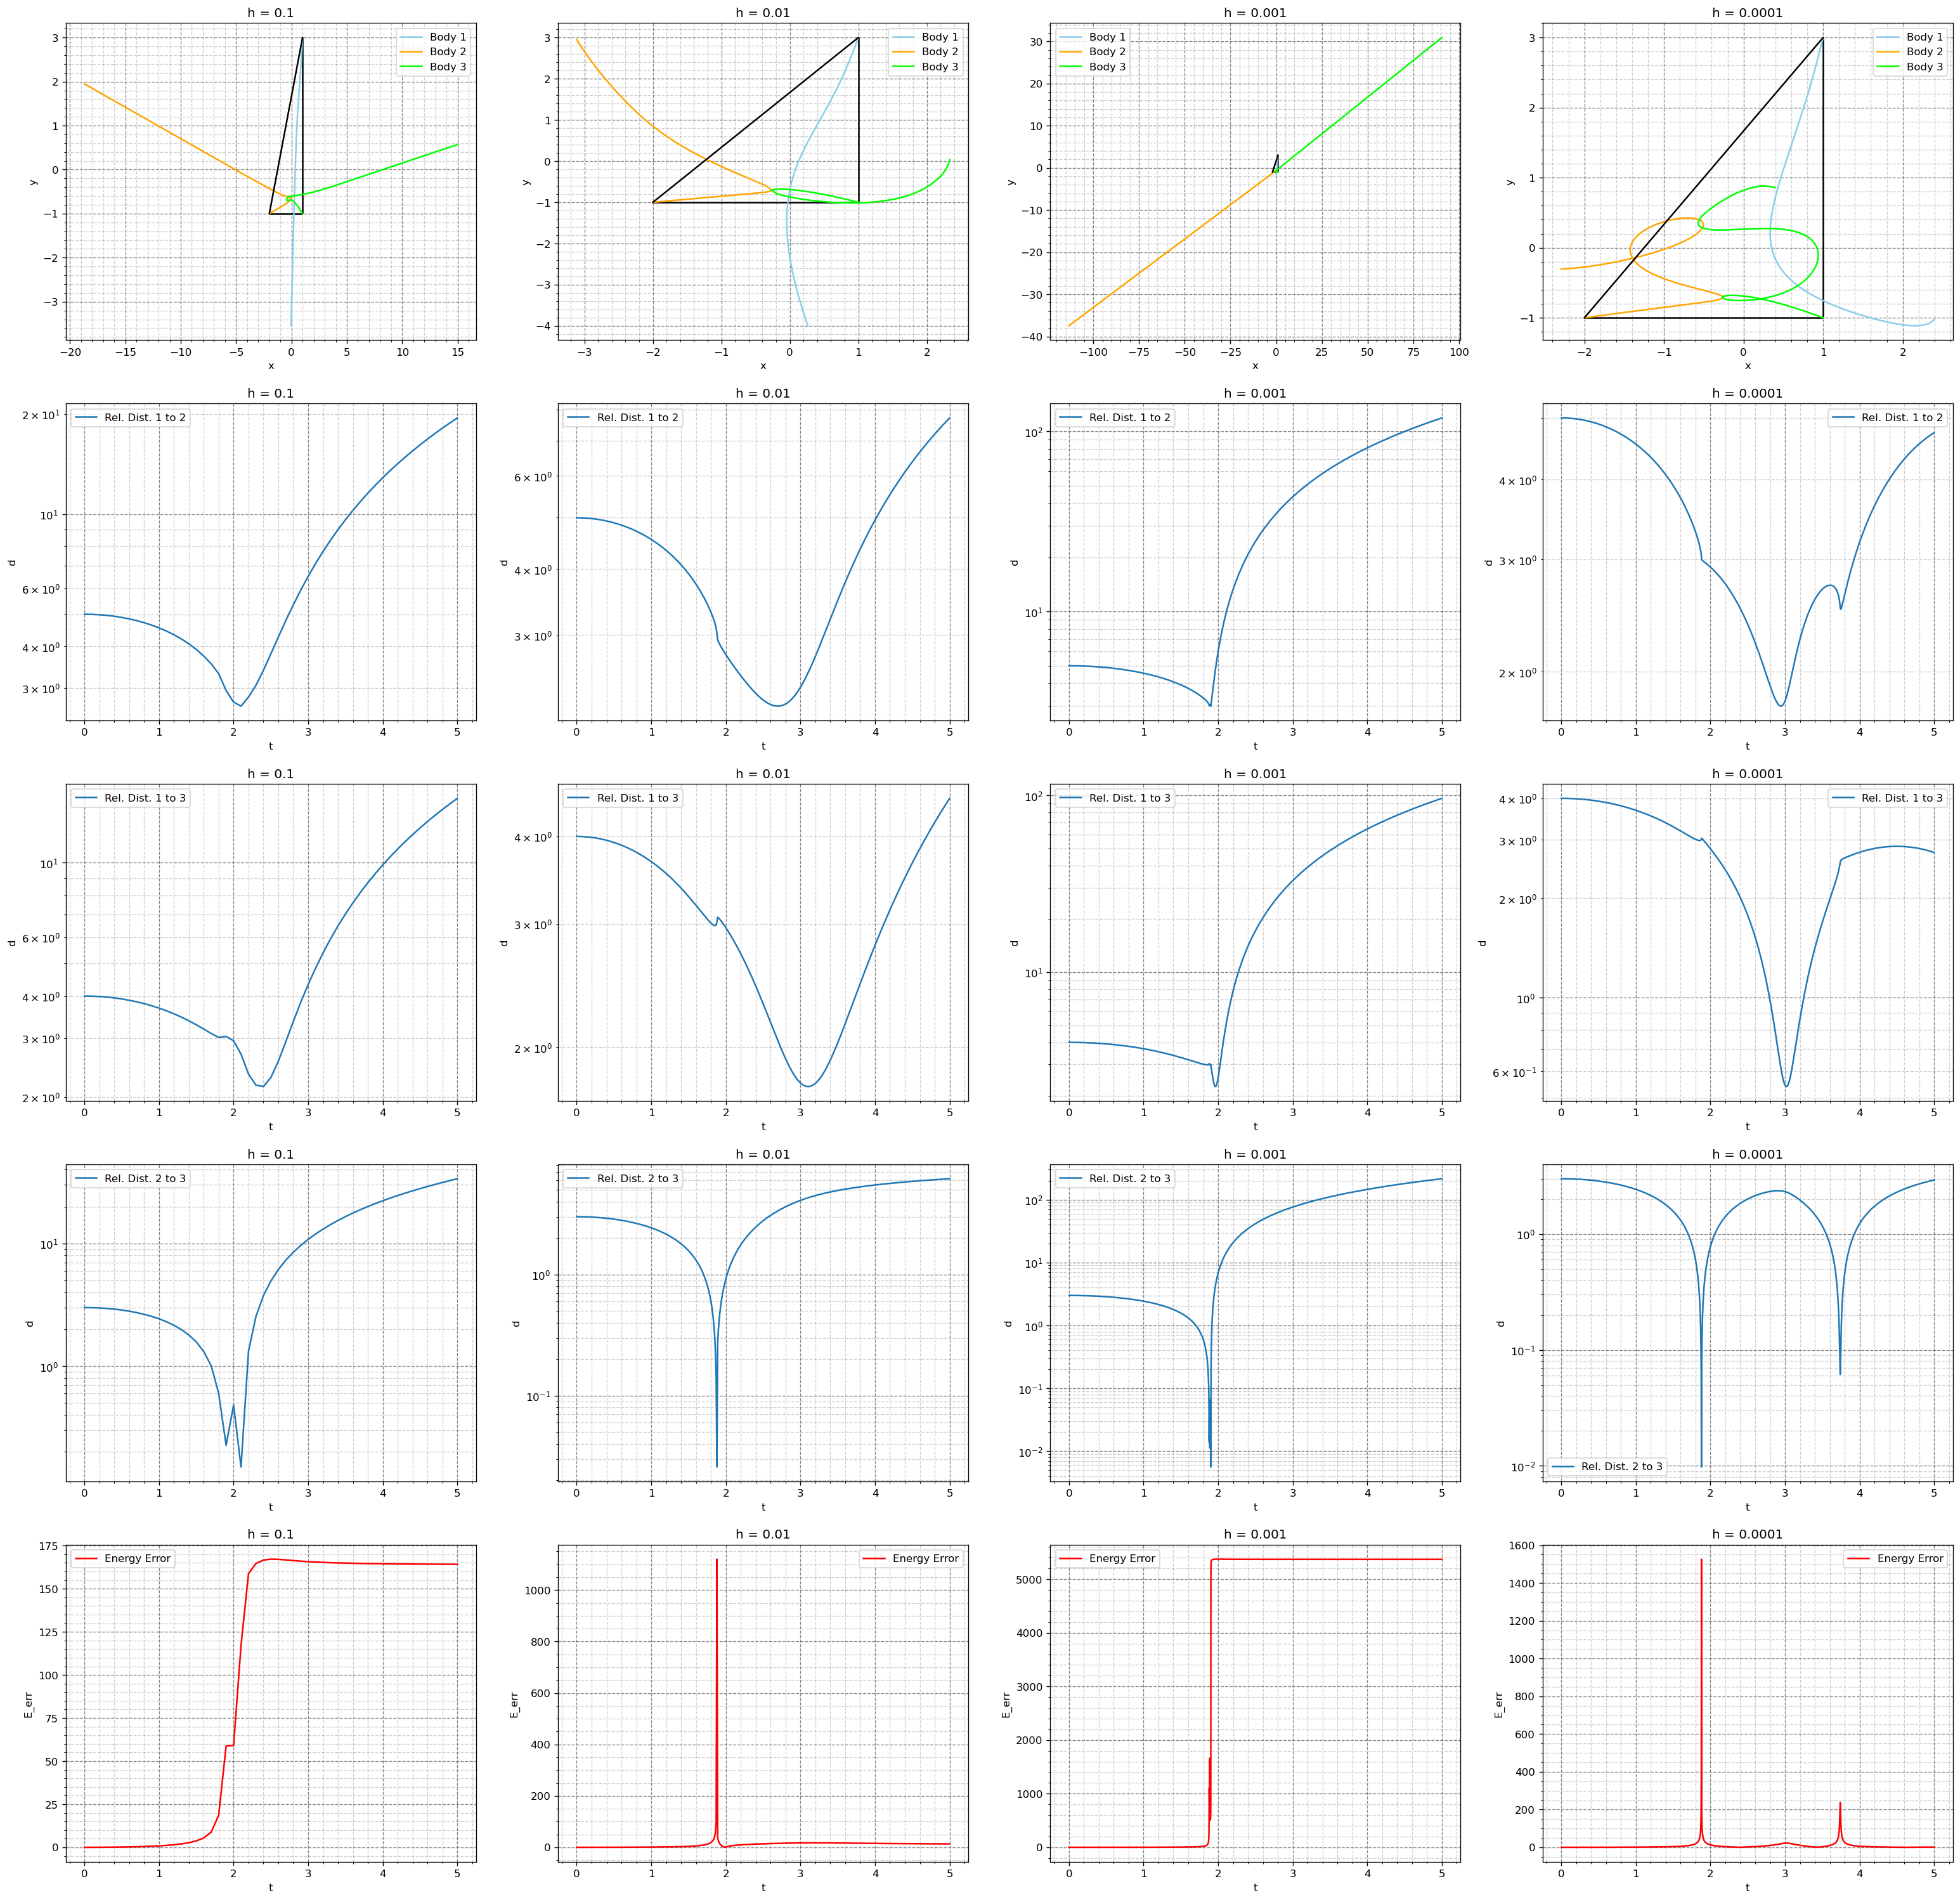

In [35]:
plt.figure(figsize=(32,32), dpi=120)
for j in range(len(h_array)):
    # Resetting the initial conditions
    y0 = np.array([1., 3., 0., 0., -2., -1., 0., 0., 1., -1., 0., 0.])
    # Doing the calculations for each step size
    n_itr = int(50000/h_array[j] * 0.0001)
    y,x = rk4(y0, 0, master, h_array[j], n_itr, f_args={"m1":3, "m2":4, "m3":5})

    # extract the position information from the output vector
    x_1 = y[:,0]
    y_1 = y[:,1]
    x_2 = y[:,4]
    y_2 = y[:,5]
    x_3 = y[:,8]
    y_3 = y[:,9]
    
    plt.subplot(5, 4, j+1)
    plt.plot(x_1,y_1, label="Body 1",color='skyblue')
    plt.plot(x_2,y_2, label="Body 2",color='orange')
    plt.plot(x_3,y_3, label="Body 3",color='lime')
    plt.hlines(-1, -2, 1, color='black')
    plt.vlines(1, -1, 3, color='black')
    plt.plot(l3, lin(l3, 4/3, 1.6666), color='black')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('h = ' + str(h_array[j]))
    #plt.yscale('log')
    plt.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    
    # plotting the relative distances
    plt.subplot(5, 4, j+5)
    plt.plot(x,distance(x_1, y_1, x_2, y_2), label="Rel. Dist. 1 to 2")
    plt.xlabel('t')
    plt.ylabel('d')
    plt.title('h = ' + str(h_array[j]))
    plt.yscale('log')
    plt.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    
    plt.subplot(5, 4, j+9)
    plt.plot(x,distance(x_1, y_1, x_3, y_3), label="Rel. Dist. 1 to 3")
    plt.xlabel('t')
    plt.ylabel('d')
    plt.title('h = ' + str(h_array[j]))
    plt.yscale('log')
    plt.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    
    plt.subplot(5, 4, j+13)
    plt.plot(x,distance(x_2, y_2, x_3, y_3), label="Rel. Dist. 2 to 3")
    plt.xlabel('t')
    plt.ylabel('d')
    plt.title('h = ' + str(h_array[j]))
    plt.yscale('log')
    plt.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()
    
    # Computing the energy error
    E_err = []
    for y_array in y:
        E_err.append(np.abs(energy(y[0], 3, 4, 5) - energy(y_array, 3, 4, 5)))
    E_err = np.asarray(E_err)
    
    plt.subplot(5, 4, j+17)
    plt.plot(x,E_err, label="Energy Error", color='red')
    plt.xlabel('t')
    plt.ylabel('E_err')
    plt.title('h = ' + str(h_array[j]))
    #plt.yscale('log')
    plt.legend()
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
    plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
    plt.minorticks_on()